### Anomaly Detection - Multivariate Time Series Data

This is an anomaly detection notebook for multivariate time series data.

In [1]:
# importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.auto_encoder import AutoEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from adtk.detector import OutlierDetector
from adtk.data import validate_series
from adtk.visualization import plot
import warnings
warnings.filterwarnings("ignore")

2024-04-01 05:13:56.736912: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 05:13:56.748765: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 05:13:56.900563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 05:13:58.685958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv("../data/generator.csv", index_col="Time")
train.index = pd.to_datetime(train.index)

In [3]:
# loading the data
train = pd.read_csv("../data/DailyDelhiClimateTrain.csv", index_col='date')
test = pd.read_csv("../data/DailyDelhiClimateTest.csv", index_col='date')

# converting data index to datetime
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [4]:
# validating the data
train = validate_series(train)
test = validate_series(test)

In [5]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Anomaly detection can be performed on univariate (1 feature), and multivariate (n features) time series data.

The main difference between both is that multivariate time series anomaly detection identifies anomalous data by analyzing the relationships and interactions among the multiple variables.

## 1. Univariate Time Series Anomaly Detection

In [6]:
def detect_anomalies(data):
    """
    This function detects and plots anomalies in a univariate time series data.

    Parameters:
    data (pandas.DataFrame): The time series data.

    Returns:
    anomalies (matplotlib.pyplot): A plot of the univariate time series data and identified anomalies.

    """
    outlier_detector = OutlierDetector(IsolationForest(contamination=0.1, random_state=42))
    anomalies = anomalies = outlier_detector.fit_detect(data)
    plot(data, anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5)
    plt.title(f"Plot of {data.columns[0].title()}", fontsize=15, weight='bold')
    plt.show()

a. **mean temp**

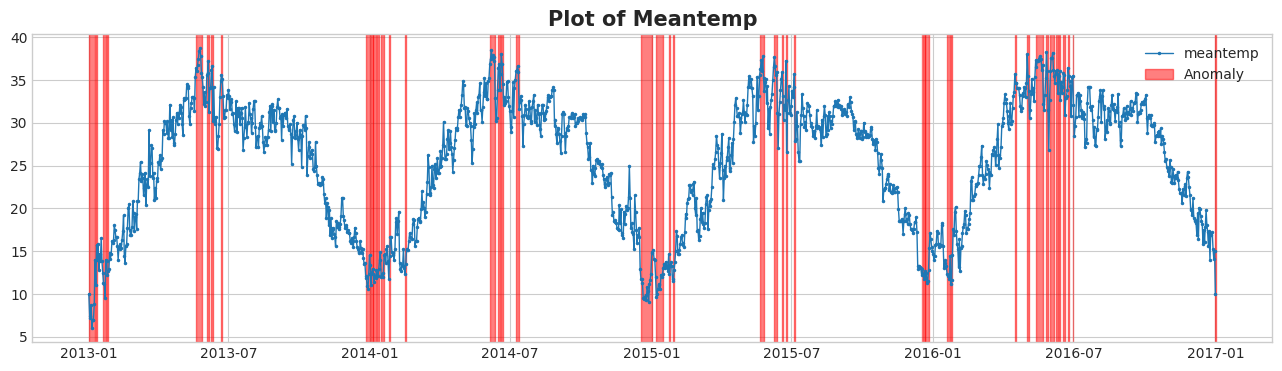

In [7]:
# detecting anomalies for meantemp
detect_anomalies(train[['meantemp']])

b. **humidity**

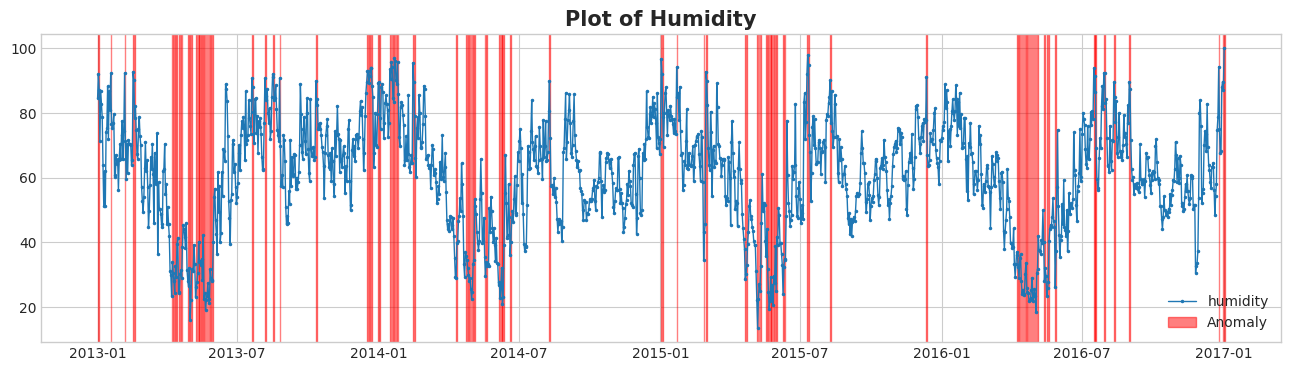

In [8]:
# detecting anomalies for humidity
detect_anomalies(train[['humidity']])

c. **wind speed**

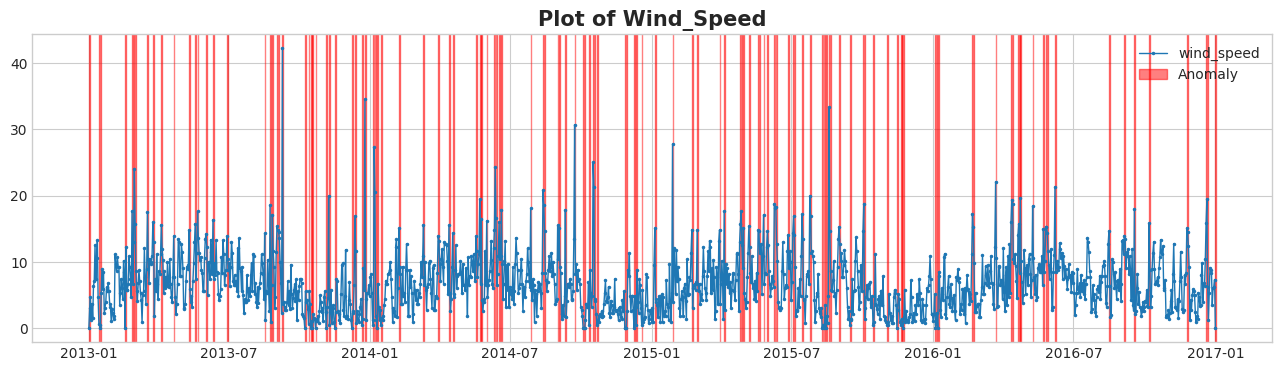

In [9]:
# detecting anomalies for meantemp
detect_anomalies(train[['wind_speed']])

d. **mean pressure**

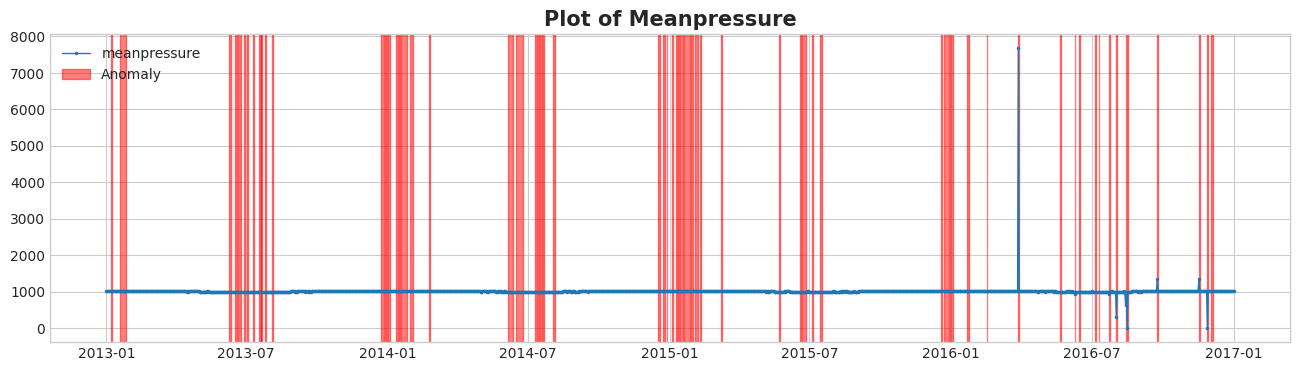

In [10]:
# detecting anomalies for meantemp
detect_anomalies(train[['meanpressure']])

## 2. Multivariate Time Series Anomaly Detection
a. **Isolation Forest**

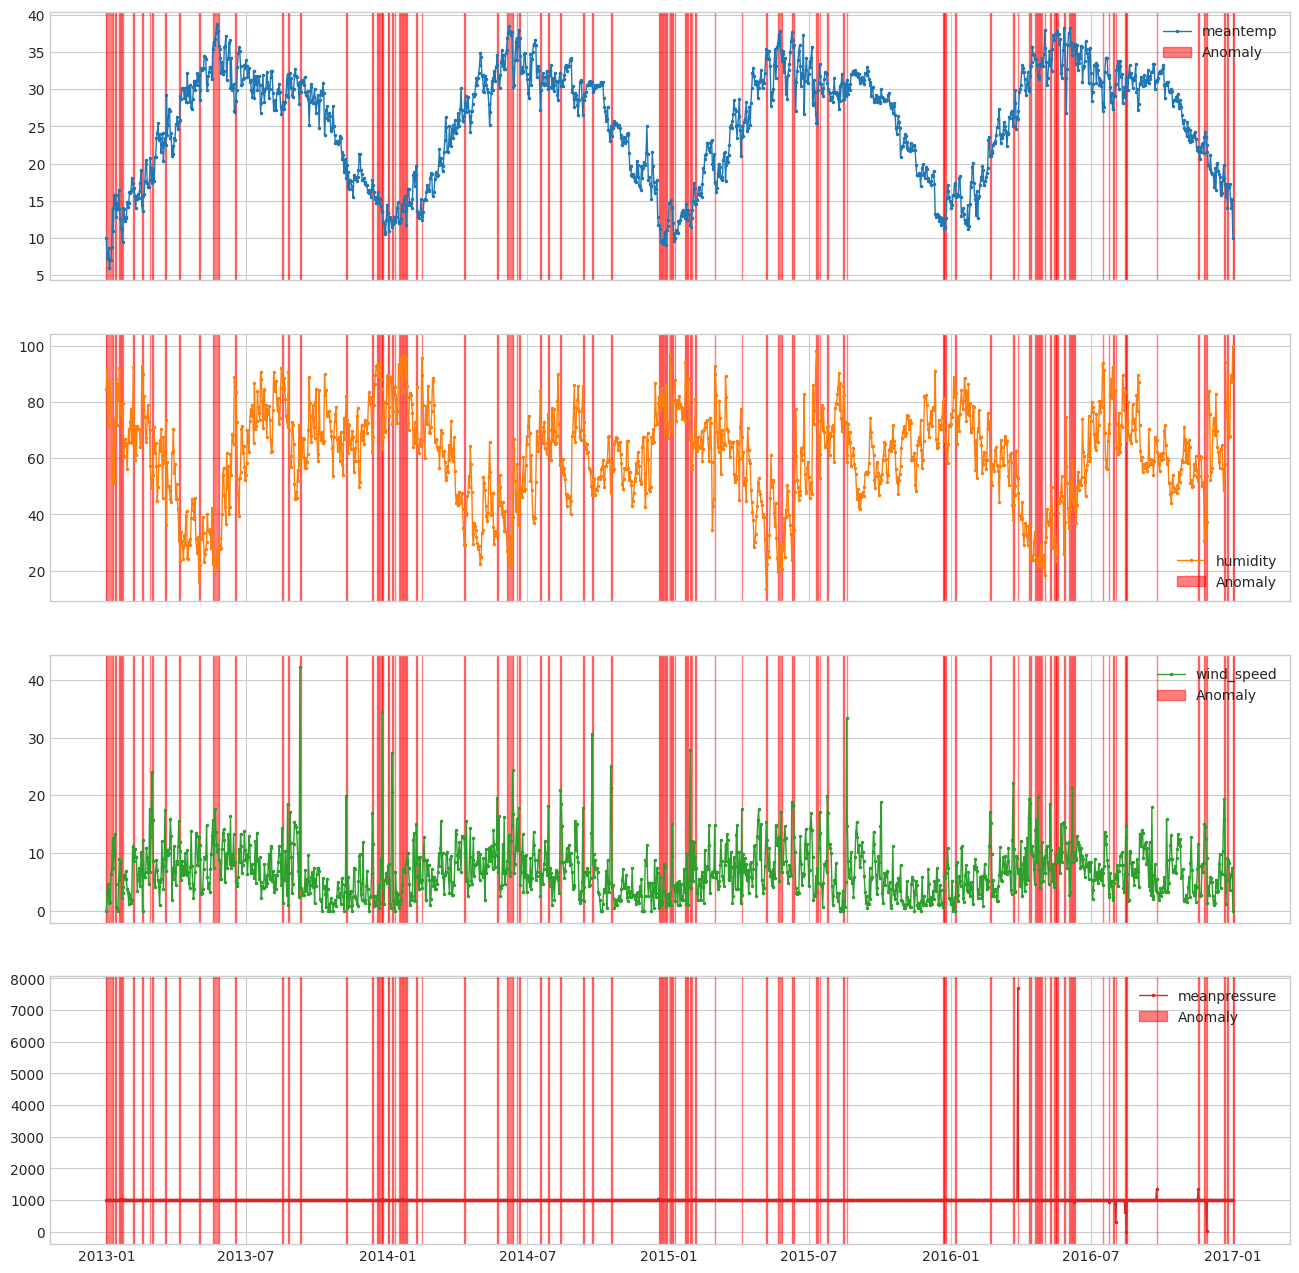

Identfied 147 anomalous instances


In [11]:
outlier_detector = OutlierDetector(IsolationForest(contamination=0.1, random_state=42))
anomalies = outlier_detector.fit_detect(train)
plot(train, anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5)
plt.show()
print(f"Identfied {sum(anomalies)} anomalous instances")

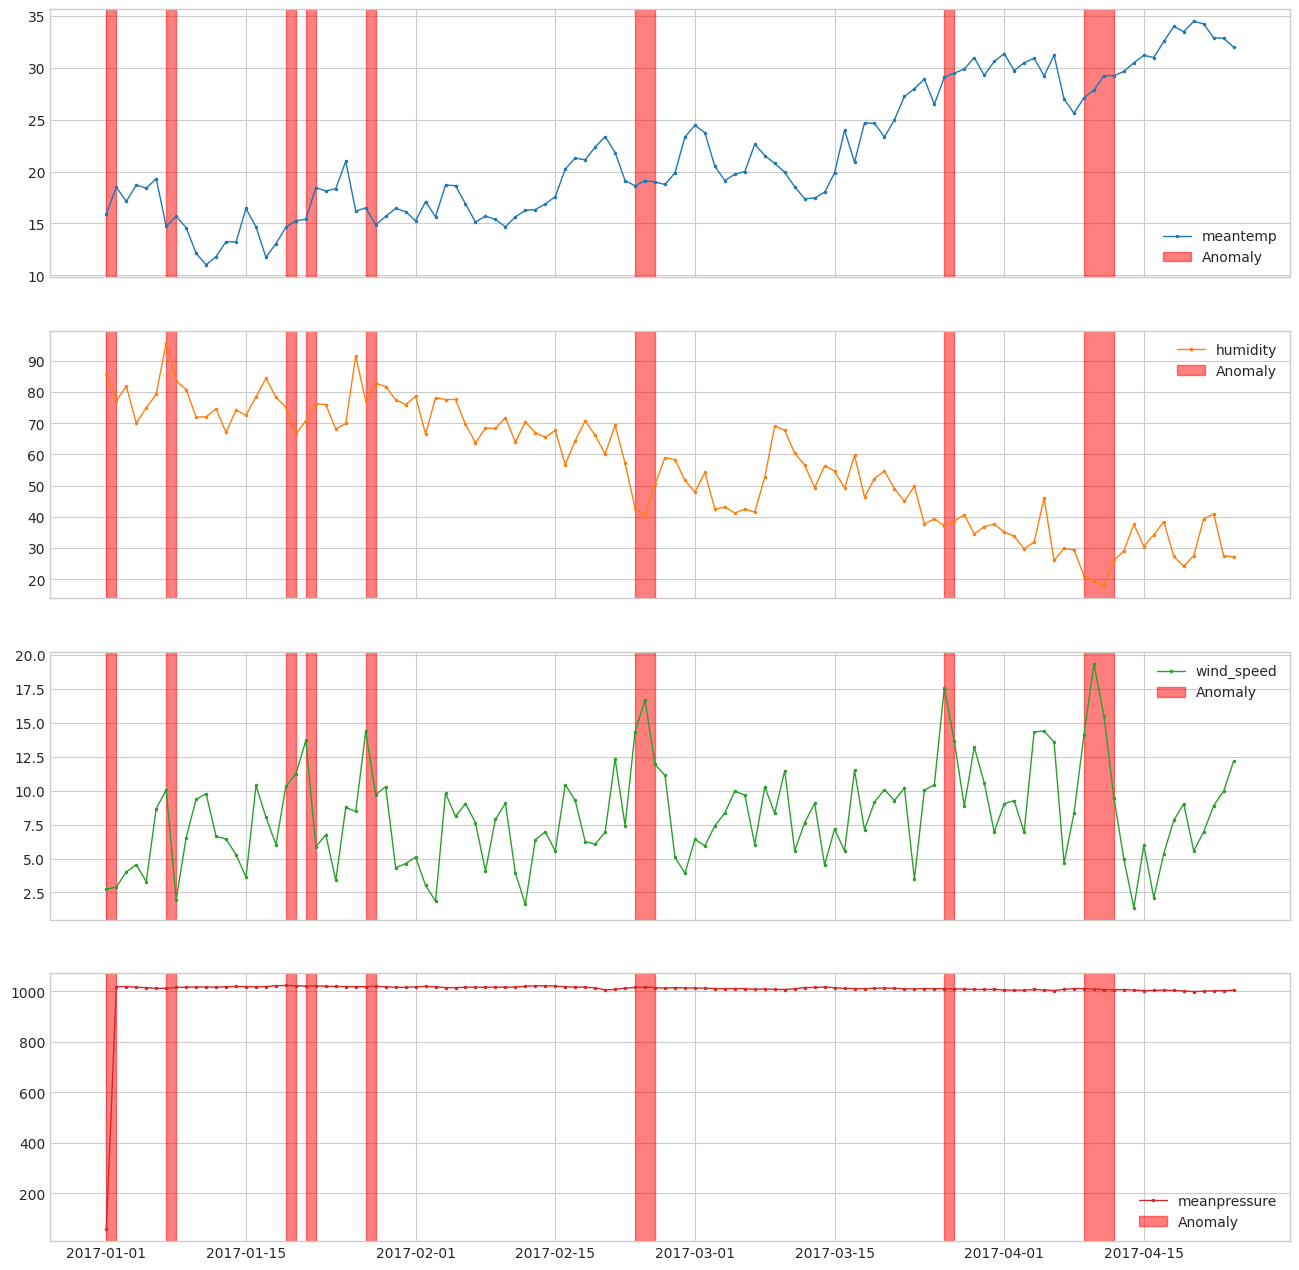

Identfied 11 anomalous instances


In [12]:
# test set
anomalies = outlier_detector.detect(test)
plot(test, anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5)
plt.show()
print(f"Identfied {sum(anomalies)} anomalous instances")

b. **Auto Encoders**

In [13]:
# standardizing and decomposing the data
scaler = StandardScaler()
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaler.fit_transform(train))

In [14]:
# creating the unsupervised model
clf = AutoEncoder(hidden_neurons=[2,25,25,2], contamination=0.1, random_state=42)
clf.fit(x_pca)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 6.3850 - val_loss: 2.3106
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.1078 - val_loss: 2.1852
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5723 - val_loss: 2.0738
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0517 - val_loss: 1.9776
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6558 - val_loss: 1.8955
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.0401 - val_loss: 1.8194
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9844 - val_loss: 1.7496
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8211 - val_loss: 1.6867
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5272 - val_loss: 1.6280
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6081 - val_loss: 1.5718
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3513 - val_loss: 1.5211
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 25, 25, 2],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fc1ac15beb0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=42, validation_size=0.1, verbose=1)

In [15]:
# standardizing and decomposing the test data
x_test = pca.transform(scaler.transform(test))

In [16]:
# predicting the test data
y_pred = clf.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [17]:
# cpnverting predictions to pandas series
y_pred = pd.Series(np.where(y_pred == 1, True, False))
y_pred.index = test.index

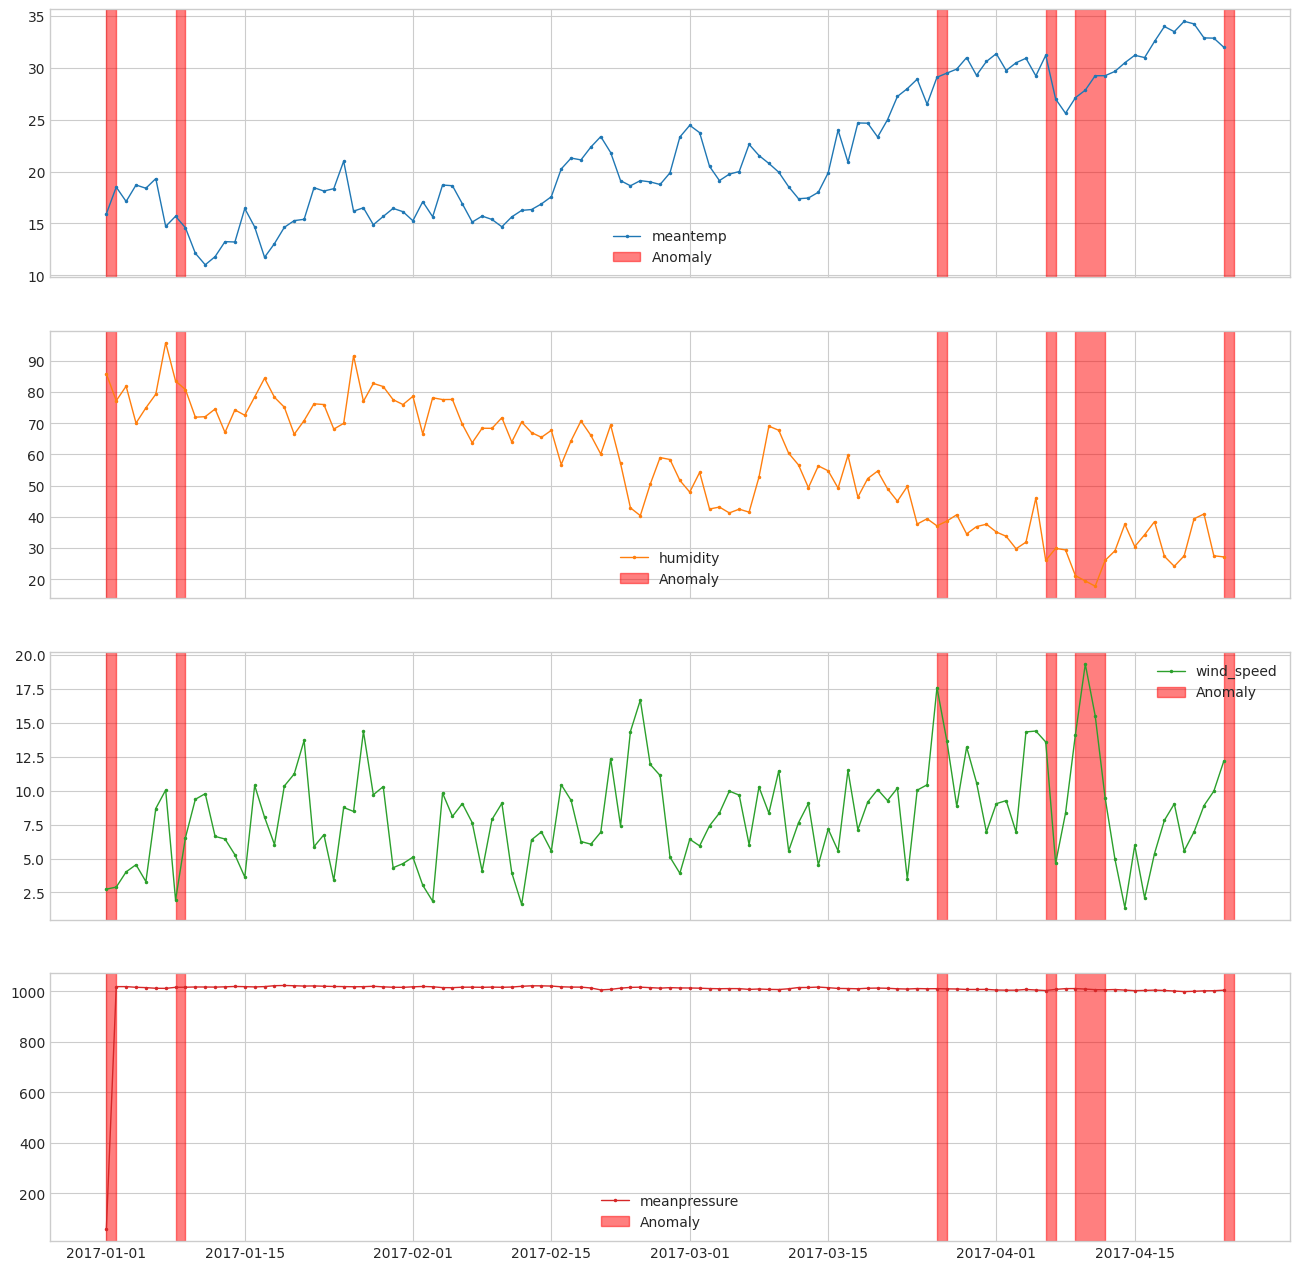

Identfied 11 anomalous instances


In [18]:
# plotting the results
plot(test, y_pred, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5)
plt.show()
print(f"Identfied {sum(anomalies)} anomalous instances")

c. **Isolation Forest & Auto Econder Ensemble**

In [19]:
# isloation forest
iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(train.values)

IsolationForest(contamination=0.1, random_state=42)

In [20]:
# returns anomaly score for each instance
isolation_scores = iso.decision_function(test)

In [21]:
# returns anomaly score for each instance
auto_encoder_scores = clf.decision_function(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


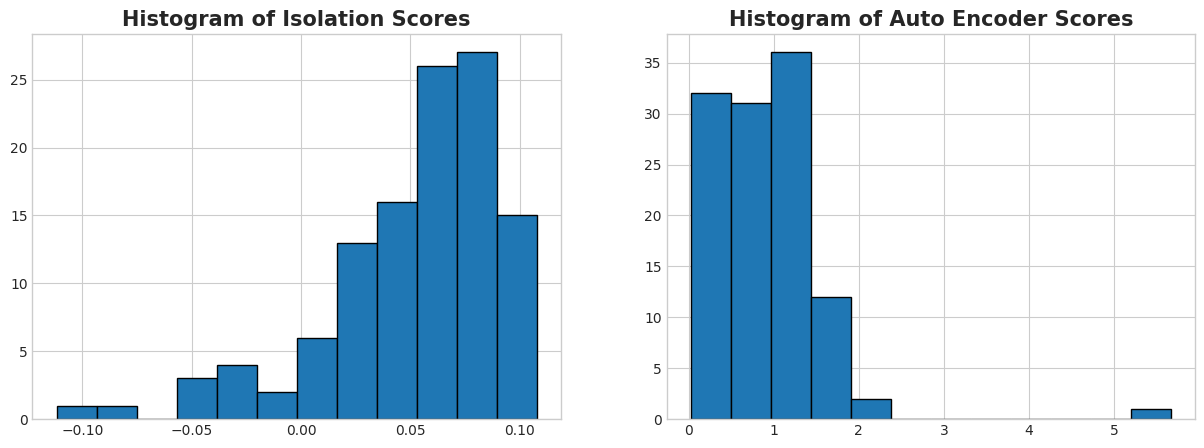

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(isolation_scores, bins=12, ec='k')
ax[1].hist(auto_encoder_scores, bins=12, ec='k')

ax[0].set_title('Histogram of Isolation Scores', fontsize=15, weight='bold')
ax[1].set_title('Histogram of Auto Encoder Scores', fontsize=15, weight='bold')

plt.show()

The histogram of both isolation and auto encoder scores shows that they are both similar but flipped.

The reason for this is that the isolation forest algorithm assigns lower scores for anomalous instances whereas auto encoder assigns higher scores for anomalous instances. This can be fixed by flipping one of the scores.

In [23]:
# initializing the scalers
isolation_scaler = MinMaxScaler()
auto_encoder_scaler = MinMaxScaler()

In [24]:
# normalizing the scores
isolation_scores = isolation_scaler.fit_transform(isolation_scores.reshape(-1, 1))
auto_encoder_scores = auto_encoder_scaler.fit_transform(auto_encoder_scores.reshape(-1, 1))
auto_encoder_scores = 1 - auto_encoder_scores # flipping auto encoder scores

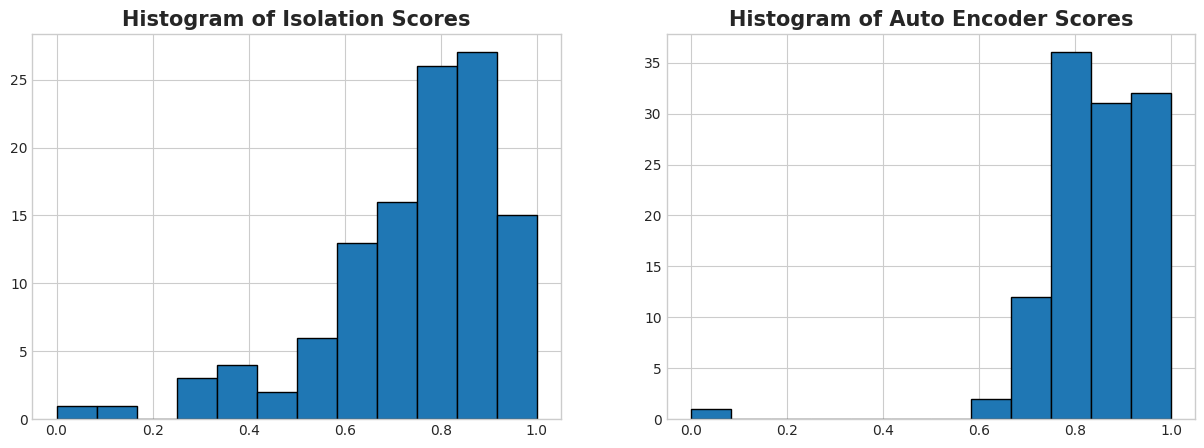

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(isolation_scores, bins=12, ec='k')
ax[1].hist(auto_encoder_scores, bins=12, ec='k')

ax[0].set_title('Histogram of Isolation Scores', fontsize=15, weight='bold')
ax[1].set_title('Histogram of Auto Encoder Scores', fontsize=15, weight='bold')

plt.show()

In [26]:
# combining both scores
ensemble_scores = (auto_encoder_scores + isolation_scores) / 2

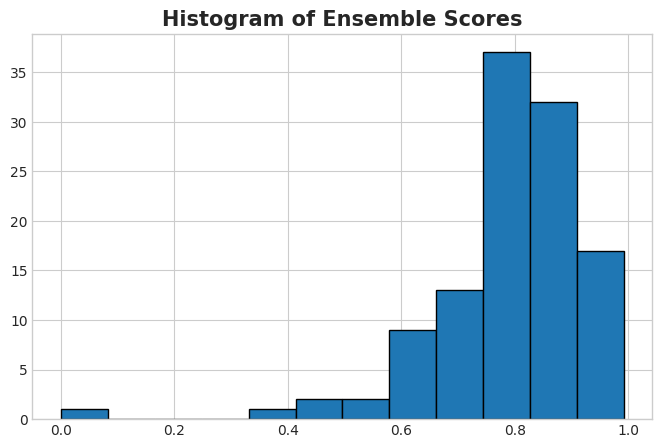

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.hist(ensemble_scores, bins=12, ec='k')

ax.set_title('Histogram of Ensemble Scores', fontsize=15, weight='bold')

plt.show()

Considering that the histogram above is left skewed, a 10% quantile will be used as the threshold to identify anomalies.

In [28]:
# identifying the threshold
threshold = int(round(np.quantile(ensemble_scores, 0.1),2)*10)/10

In [29]:
# finding the anomalies using the threshold
ensemble_anomalies = pd.Series((ensemble_scores < threshold).flatten())
ensemble_anomalies.index = test.index

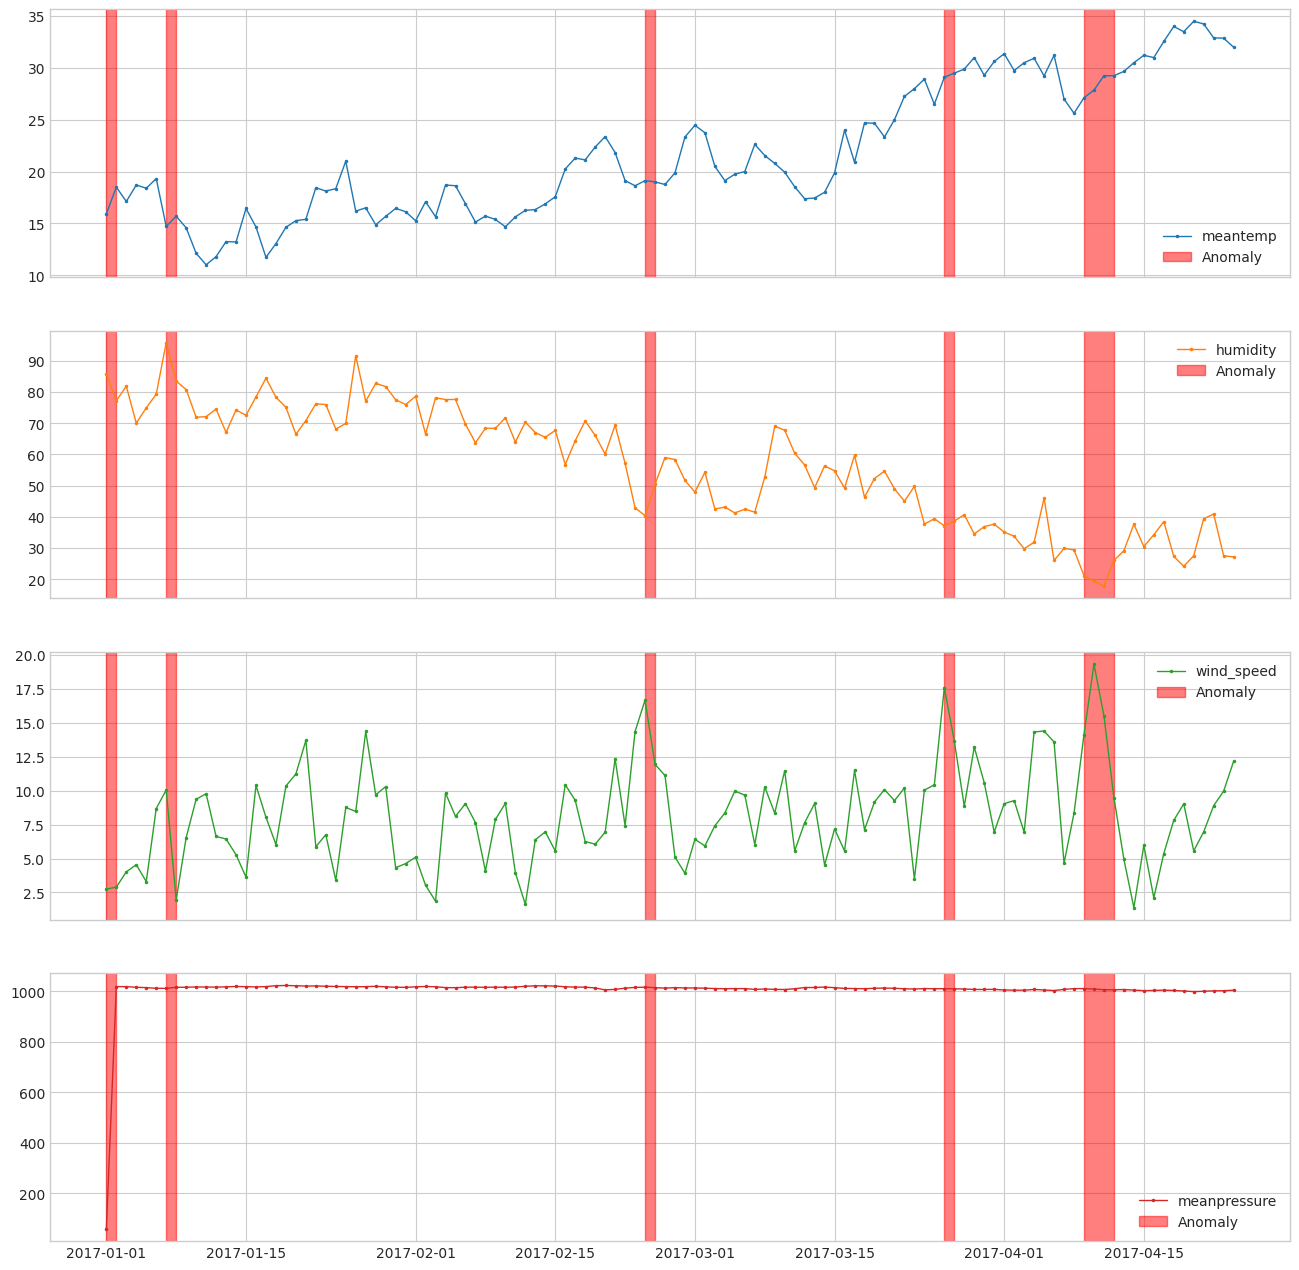

Identfied 7 anomalous instances


In [30]:
# plotting the results
plot(test, ensemble_anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5)
plt.show()
print(f"Identfied {sum(ensemble_anomalies)} anomalous instances")

Conclusions:
- While both Isolation Forest and AutoEncoders successfully detected 11 anomalies in the test dataset, the identified anomalies were not consistent. Each algorithm flagged anomalies in different parts of the dataset, casting doubt on the reliability of the results.
- On the other hand, the ensemble model, upon visual inspection of the results, accurately identified 7 anomalies, suggesting a more cohesive and trustworthy outcome.